In [2]:
import os

(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

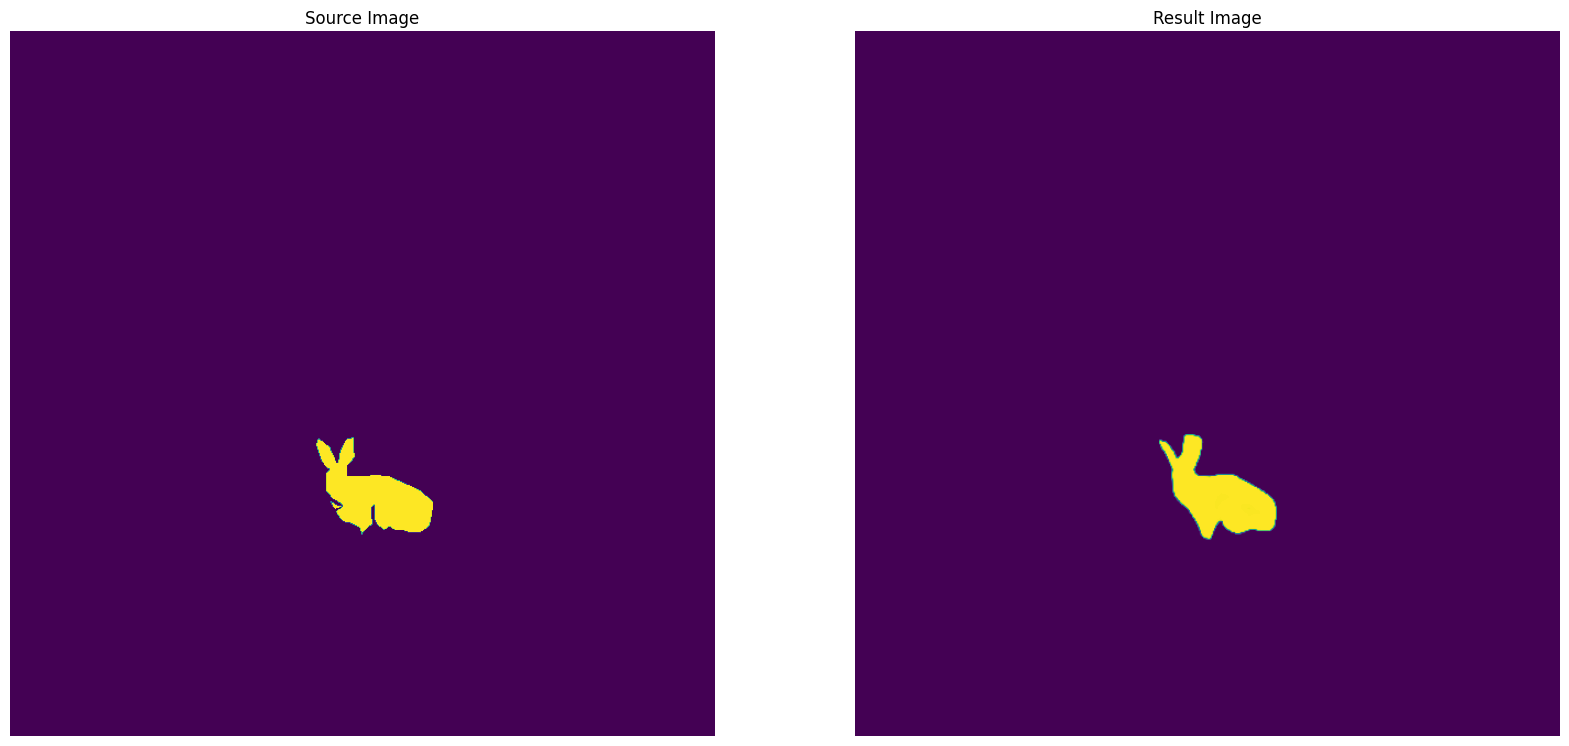

In [4]:
from matplotlib import pyplot as plt
# display 2x1 subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(plt.imread(os.path.join(source_dir, image_name)))
axs[0].set_title('Source Image')
axs[0].axis('off')
axs[1].imshow(plt.imread(os.path.join(result_dir, image_name)))
axs[1].set_title('Result Image')
axs[1].axis('off')

In [1]:
import cv2
import os
import numpy as np
result_dir = '/school/CSCI_2470/final/HGINet/result/COD10K'
source_dir = '/school/CSCI_2470/final/HGINet/assets/TestDataset/COD10K/GT'
image_name = 'COD10K-CAM-2-Terrestrial-40-Rabbit-2348.png'

assert(os.path.exists(result_dir))
assert(os.path.exists(source_dir))
assert(os.path.exists(os.path.join(source_dir, image_name)))
assert(os.path.exists(os.path.join(result_dir, image_name)))

In [2]:

gt_img = cv2.imread(os.path.join(source_dir, image_name), cv2.IMREAD_GRAYSCALE)
result_img = cv2.imread(os.path.join(result_dir, image_name), cv2.IMREAD_GRAYSCALE)

gt_img = gt_img.astype(bool)
result_img = result_img.astype(np.float32) / 255

In [3]:
from Src.metrics.WFM import WFM
# test wfm-measure
wfm_result = WFM(result_img, gt_img)
# just in case:
print(wfm_result)
print(WFM(~gt_img, gt_img))
print(WFM(gt_img, gt_img))

0.910192289794153
0.0
1.0


In [3]:
from Src.metrics.EM import EM
# test structure measure
em_result = EM(result_img, gt_img)
print(em_result)
print(EM(~gt_img, gt_img))
print(EM(gt_img, gt_img))

0.991394248316534
2.1413468045989373e-25
1.0000024414112898


In [4]:
from Src.metrics.SM import SM
# test structure measure
sm_result = SM(result_img, gt_img)
print(sm_result)
print(SM(~gt_img, gt_img))
print(SM(gt_img, gt_img))

0.9542810224292596
-0.011080152594976665
0.9999999998867325
